# RunsBattedIn Analysis
## For the start of the 2017 season
### MSP 04.13.2017

This jupyter notebook lays out some for for projecting RBIs going in to the 2017.

In [1]:
from IPython.display import HTML
HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.input').hide();} else { $('div.input').show(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [3]:
# now read in all the data: it's a lot, but is set up this way so that
#  we can slice across batting order.

#
# general fangraphs data for players
#
# all with > 100 PA at given lineup position

def read_team_batting_data(infile):
    BatData = np.genfromtxt(infile,\
                  dtype={'names': ("Team","G","AB","PA","H",\
                                   "1B","2B","3B","HR","R","RBI","BB","IBB",
                                   "SO","HBP","SF","SH","GDP","SB","CS","AVG"),\
                         'formats': ('S20','i2','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4','f4','f4',\
                                    'f4','f4','f4','f4','f4','f4','f4','f4')},\
                 skip_header=1,delimiter=',')
    return BatData


Teams2016 = read_team_batting_data('2016Batting/Team2016Totals.csv')

def read_batting_data(infile):
    BatData = np.genfromtxt(infile,\
                  dtype={'names': ("Name","Team","G","AB","PA","H",\
                                   "1B","2B","3B","HR","R","RBI","BB","IBB",
                                   "SO","HBP","SF","SH","GDP","SB","CS","AVG","playerid"),\
                         'formats': ('S20','S20','i2','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4','f4','f4',\
                                    'f4','f4','f4','f4','f4','f4','f4','f4','i2')},\
                 skip_header=1,delimiter=',')
    return BatData



Total2016   = read_batting_data('2016Batting/TotalBatting.csv')

First2016   = read_batting_data('2016Batting/BattingFirst.csv')
Second2016  = read_batting_data('2016Batting/BattingSecond.csv')
Third2016   = read_batting_data('2016Batting/BattingThird.csv')
Fourth2016  = read_batting_data('2016Batting/BattingFourth.csv')
Fifth2016   = read_batting_data('2016Batting/BattingFifth.csv')
Sixth2016   = read_batting_data('2016Batting/BattingSixth.csv')
Seventh2016 = read_batting_data('2016Batting/BattingSeventh.csv')
Eighth2016  = read_batting_data('2016Batting/BattingEighth.csv')
Ninth2016   = read_batting_data('2016Batting/BattingNinth.csv')

#
# we'll also read in some statcast data for an argument below
#
#    (https://baseballsavant.mlb.com/)

def read_statcast_data(infile):
    outdict = np.genfromtxt(infile,\
        dtype={'names': ("pitch_type","pitch_id","game_date",\
                         "start_speed","x0","z0","player_name","batter","pitcher",\
                         "events","description","spin_dir","spin_rate","break_angle",\
                         "break_length","zone","des","game_type","stand","p_throws",\
                         "home_team","away_team","type","hit_location","bb_type",\
                         "balls","strikes","game_year","pfx_x","pfx_z","px","pz",\
                         "on_3b","on_2b","on_1b","outs_when_up","inning","inning_topbot",\
                         "hc_x","hc_y","tfs","tfs_zulu","catcher","umpire","sv_id",\
                         "vx0","vy0","vz0","ax","ay","az","sz_top","sz_bot","hit_distance_sc",\
                         "hit_speed","hit_angle","effective_speed","release_spin_rate",\
                         "release_extension","game_pk"),\
                'formats': ('S2','S20','S20',\
                            'f4','S20','S20','S20','S20','S20',\
                            'S40','S40','S20','S20','S20',\
                            'S20','S20','S20','S20','S20','S20',\
                            'S20','S20','S20','S20','S20',\
                            'S20','S20','S20','S20','S20','S20','S20',\
                            'S20','S20','S20','S20','S20','S20',\
                            'S20','S20','S20','S20','S20','S20','S20',\
                            'S20','S20','S20','S20','S20','S20','S20','S20','S20',\
                            'f4','f4','f4','f4',
                            'S20','S20')},\
                 skip_header=1,delimiter=',')
    return outdict

AugustMLB = read_statcast_data('2016Batting/AugustStatcast.csv')



As a first plot, how did teams do in recording RBIs last year?

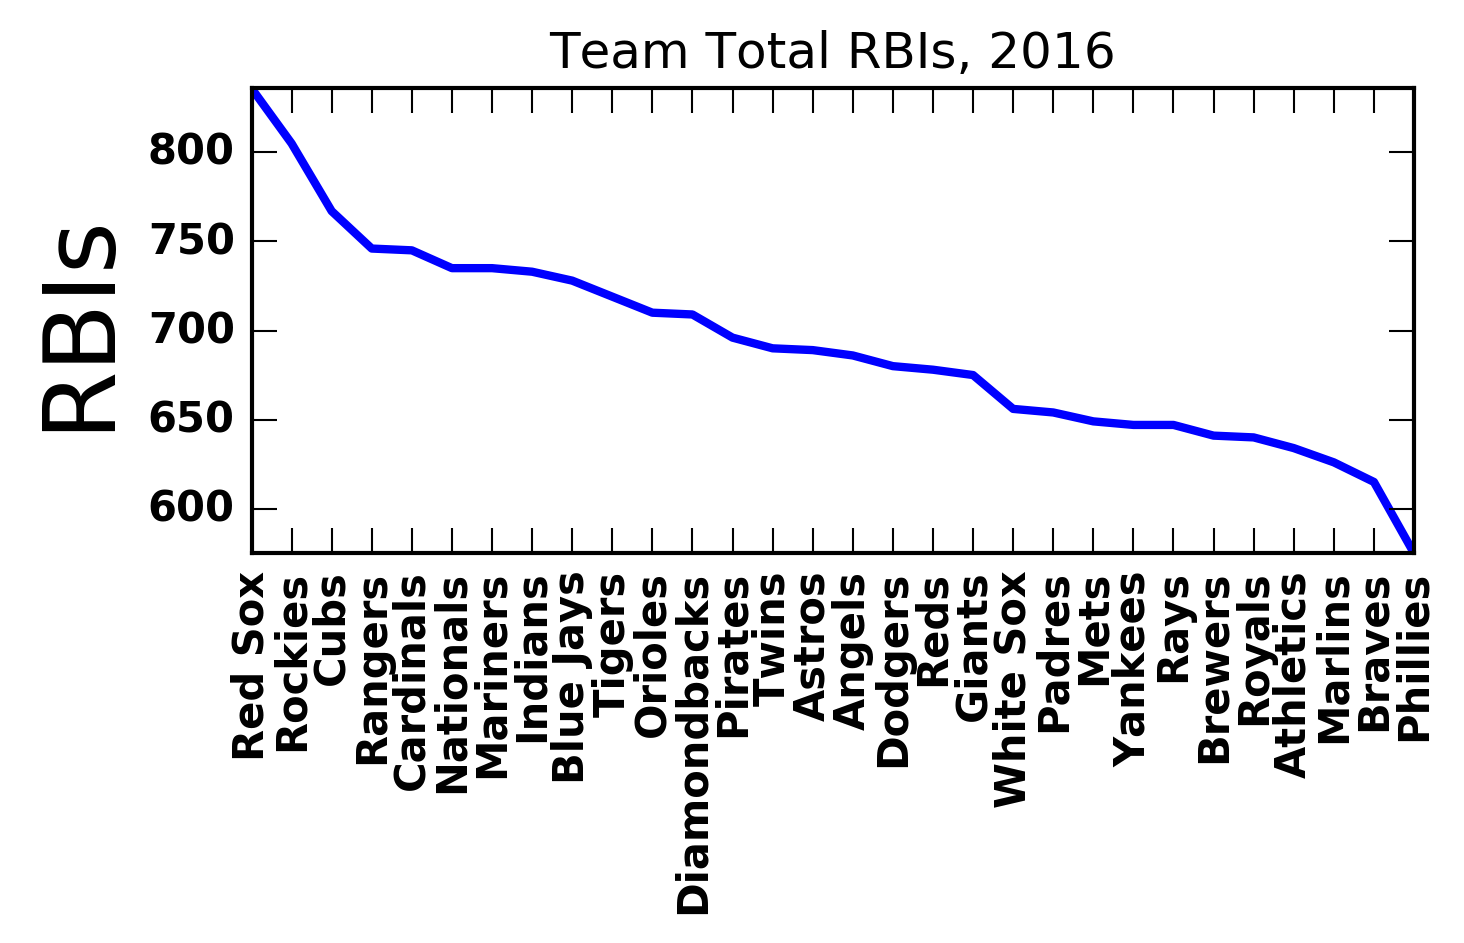

In [4]:
team_rbis = Teams2016['RBI']
team_name = Teams2016['Team']

plt.figure(figsize=(5,2))
plt.plot(np.linspace(1.,team_rbis.size,team_rbis.size),team_rbis[(-1.*team_rbis).argsort()])
plt.ylabel('RBIs',size=24)
plt.title('Team Total RBIs, 2016')
_ = plt.axis([1.,30.,np.min(team_rbis),np.max(team_rbis)])

# You can specify a rotation for the tick labels in degrees or with keywords.
_ = plt.xticks(np.linspace(1,30,30), team_name[(-1.*team_rbis).argsort()], rotation='vertical')

Anyone think that Coors inflates run totals?

The team rankings makes me think that we'll want to put some sort of caveat on looking at individual stats based on the team they are on. Let's start looking at individual players by setting up a ranking within the league.

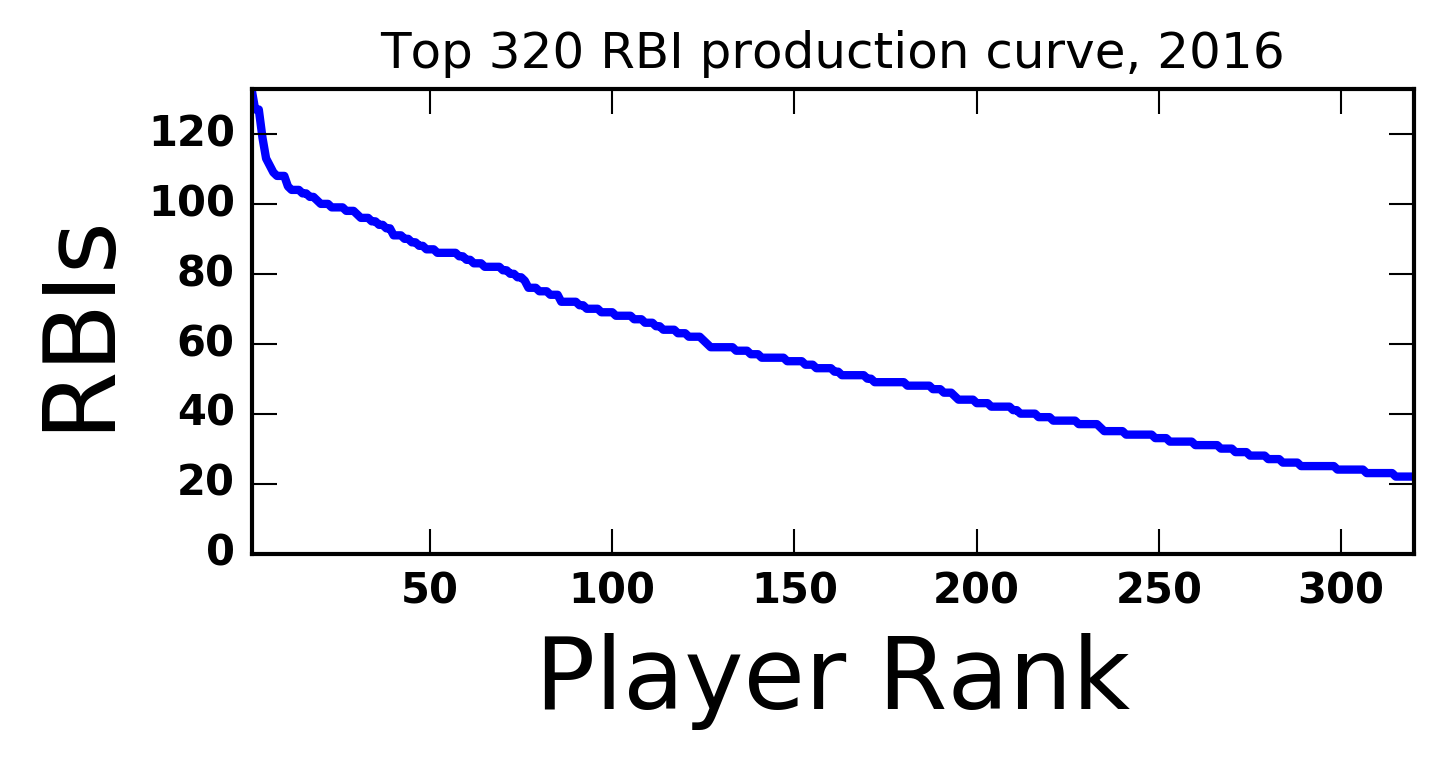

In [5]:
rbis = Total2016['RBI']
pas = Total2016['PA']
names = Total2016['Name']

plt.figure(figsize=(5,2))
plt.plot(np.linspace(1.,rbis.size,rbis.size),rbis[(-1.*rbis).argsort()])
plt.xlabel('Player Rank',size=24)
plt.ylabel('RBIs',size=24)
plt.title('Top 320 RBI production curve, 2016')
_ = plt.axis([1.,320.,np.min(rbis),np.max(rbis)])

#### What to notice? 

First, you REALLY want those guys who are bending the curve upward above 100 RBIs. The fact that the slope changes indicates that they are exponentially more valuable than guys in the shallower slope set. They are a pretty typical list:



In [6]:
print('100+ RBIs, 2016')
print('-----------------')
for indx in (-1.*rbis).argsort()[0:22]:
    print('{0:4d} -- {1:20s} ({2:3d})'.format(int(rbis[indx]),names[indx],int(pas[indx])))

100+ RBIs, 2016
-----------------
 133 -- Nolan Arenado        (696)
 127 -- Edwin Encarnacion    (702)
 127 -- David Ortiz          (626)
 119 -- Albert Pujols        (650)
 113 -- Mookie Betts         (730)
 111 -- Hanley Ramirez       (620)
 109 -- Anthony Rizzo        (676)
 108 -- Matt Kemp            (672)
 108 -- Mark Trumbo          (667)
 108 -- Miguel Cabrera       (679)
 105 -- Nelson Cruz          (667)
 104 -- Eric Hosmer          (667)
 104 -- Adrian Beltre        (640)
 104 -- Daniel Murphy        (582)
 103 -- Robinson Cano        (715)
 103 -- Adam Duvall          (608)
 102 -- Kris Bryant          (699)
 102 -- Khris Davis          (610)
 101 -- Mike Napoli          (645)
 100 -- Mike Trout           (681)
 100 -- Jose Abreu           (695)
 100 -- Carlos Gonzalez      (632)


The last column here is the number of plate appearances. Obviously, all these guys had a full season's worth of plate appearances, with the only guy under 600 PAs being Daniel Murphy.

This top RBI-producer trend persists if you look at this as RBI/PA--no Gary Sanchez-type outliers here (see the HR analysis for context).

The next question to work on is **how** do guys get RBIs?



If 'description' has 'scores' in it, RBIs were recorded. Do an anatomy of the RBI?